<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Preparation</a></span></li><li><span><a href="#Feature-Selection" data-toc-modified-id="Feature-Selection-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Feature Selection</a></span><ul class="toc-item"><li><span><a href="#Filters" data-toc-modified-id="Filters-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Filters</a></span></li><li><span><a href="#Wrappers" data-toc-modified-id="Wrappers-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Wrappers</a></span><ul class="toc-item"><li><span><a href="#RFE" data-toc-modified-id="RFE-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>RFE</a></span></li><li><span><a href="#SFS" data-toc-modified-id="SFS-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>SFS</a></span></li></ul></li></ul></li><li><span><a href="#Embeded" data-toc-modified-id="Embeded-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Embeded</a></span></li></ul></div>

# Data Preparation

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [ ]:
df=pd.read_csv('/home/mauritian/Downloads/acs2015_county_data.csv')

In [ ]:
df.head()

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,...,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,...,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,...,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,...,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7


In [ ]:
df.columns

Index(['CensusId', 'State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen', 'Income',
       'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')

1. We will predict Unemployment
2. CensusId, State, County will be dropped since they dont bring any useful information.
3. TotalPopulation is kept, instead we normalize the gender

In [ ]:
df.drop(['CensusId', 'State', 'County'], axis=1, inplace=True)

In [ ]:
df.drop('Men', axis=1, inplace=True)

In [ ]:
df.Women=df.Women/df.TotalPop

In [ ]:
df.Citizen=df.Citizen/df.TotalPop

In [ ]:
df.Employed=df.Employed/df.TotalPop

In [ ]:
df.isna().sum()

TotalPop           0
Women              0
Hispanic           0
White              0
Black              0
Native             0
Asian              0
Pacific            0
Citizen            0
Income             1
IncomeErr          1
IncomePerCap       0
IncomePerCapErr    0
Poverty            0
ChildPoverty       1
Professional       0
Service            0
Office             0
Construction       0
Production         0
Drive              0
Carpool            0
Transit            0
Walk               0
OtherTransp        0
WorkAtHome         0
MeanCommute        0
Employed           0
PrivateWork        0
PublicWork         0
SelfEmployed       0
FamilyWork         0
Unemployment       0
dtype: int64

In [ ]:
df.shape

(3220, 33)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
TotalPop,3218.0,99471.07,319395.09,267.00,11225.25,26079.50,66457.50,10038388.00
Women,3218.0,0.50,0.02,0.27,0.50,0.50,0.51,0.59
Hispanic,3218.0,11.01,19.24,0.00,1.90,3.90,9.80,99.90
White,3218.0,75.45,22.92,0.00,64.10,84.10,93.20,99.80
Black,3218.0,8.67,14.28,0.00,0.50,1.90,9.60,85.90
Native,3218.0,1.72,7.25,0.00,0.10,0.30,0.60,92.10
Asian,3218.0,1.22,2.61,0.00,0.20,0.50,1.20,41.60
Pacific,3218.0,0.07,0.39,0.00,0.00,0.00,0.00,11.10
Citizen,3218.0,0.75,0.05,0.44,0.73,0.76,0.78,0.92
Income,3218.0,46123.62,12908.43,10499.00,38191.25,44748.50,52059.00,123453.00


In [ ]:
df.corr().Unemployment.sort_values()

Employed          -0.698771
IncomePerCap      -0.547239
White             -0.540146
Income            -0.509054
WorkAtHome        -0.309747
Professional      -0.300318
SelfEmployed      -0.293592
IncomePerCapErr   -0.251561
IncomeErr         -0.226349
FamilyWork        -0.123187
PrivateWork       -0.104118
Construction      -0.091779
Walk              -0.080272
Asian             -0.055315
Pacific           -0.015888
Citizen            0.005613
TotalPop           0.030313
Transit            0.030784
Production         0.079907
Carpool            0.088236
Drive              0.096529
Women              0.105154
OtherTransp        0.117109
Office             0.161331
Native             0.187386
MeanCommute        0.292585
PublicWork         0.312533
Hispanic           0.321536
Black              0.352943
Service            0.365371
ChildPoverty       0.678441
Poverty            0.712419
Unemployment       1.000000
Name: Unemployment, dtype: float64

<AxesSubplot:>

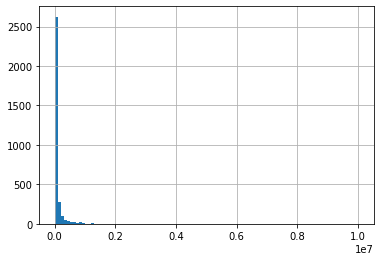

In [ ]:
df.TotalPop.hist(bins=100)

In [ ]:
df.TotalPop=df.TotalPop.apply(np.log)

<AxesSubplot:>

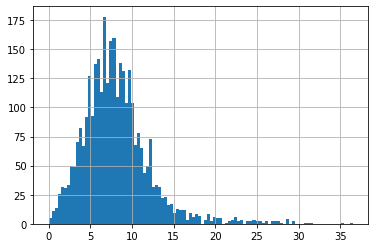

In [ ]:
df.Unemployment.hist(bins=100)

<AxesSubplot:>

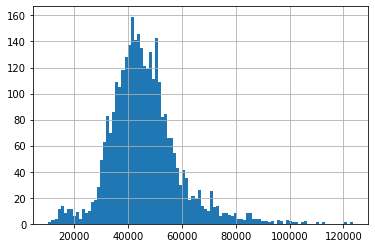

In [ ]:
df.Income.hist(bins=100)

<AxesSubplot:>

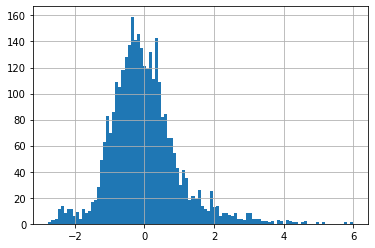

In [ ]:
((df.Income-df.Income.mean())/df.Income.std()).hist(bins=100)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()

In [ ]:
scaler.fit(df[['Income']])

StandardScaler()

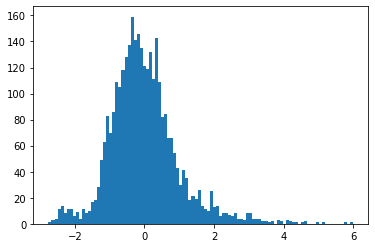

In [ ]:
plt.hist(scaler.transform(df[['Income']]), bins=100);

In [ ]:
scaler=StandardScaler()

In [ ]:
df.loc[:, 'Income':'IncomePerCapErr']=scaler.fit_transform(df.loc[:, 'Income':'IncomePerCapErr'])

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TotalPop,3218.0,1.027683e+01,1.457344,5.587249,9.325921,10.168904,11.104318,16.121927
Women,3218.0,4.999030e-01,0.023886,0.267775,0.495354,0.504656,0.511789,0.594210
Hispanic,3218.0,1.100603e+01,19.242390,0.000000,1.900000,3.900000,9.800000,99.900000
White,3218.0,7.545124e+01,22.922274,0.000000,64.100000,84.100000,93.200000,99.800000
Black,3218.0,8.670883e+00,14.281924,0.000000,0.500000,1.900000,9.600000,85.900000
Native,3218.0,1.720603e+00,7.252676,0.000000,0.100000,0.300000,0.600000,92.100000
Asian,3218.0,1.223244e+00,2.610159,0.000000,0.200000,0.500000,1.200000,41.600000
Pacific,3218.0,7.181479e-02,0.393455,0.000000,0.000000,0.000000,0.000000,11.100000
Citizen,3218.0,7.471945e-01,0.052651,0.442472,0.729423,0.757548,0.778628,0.919509
Income,3218.0,-2.691032e-17,1.000155,-2.760224,-0.614606,-0.106545,0.459878,5.991542


# Feature Selection

## Filters

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

In [ ]:
y=df.Unemployment
X=df.drop('Unemployment', axis=1)

In [ ]:
X.shape

(3218, 32)

In [ ]:
selector=SelectKBest(f_regression, k=6) #I selected 6 columns out of 32 from X

In [ ]:
selection=selector.fit_transform(X,y)

In [ ]:
pd.DataFrame(selection).head()

,0,1,2,3,4,5
0,75.8,0.399598,0.161477,12.9,18.6,0.434364
1,83.1,0.320025,0.539857,13.4,19.2,0.440511
2,46.2,-1.019618,-1.154696,26.7,45.3,0.319211
3,74.5,-0.576892,-0.895176,16.8,27.9,0.366926
4,87.9,-0.024067,-0.555878,16.7,27.2,0.384491


In [ ]:
X.head()

,TotalPop,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,Income,...,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork
0,10.919099,0.515673,2.6,75.8,18.5,0.4,1.0,0.0,0.737491,0.399598,...,0.1,0.5,1.3,1.8,26.5,0.434364,73.6,20.9,5.5,0.0
1,12.181375,0.511513,4.5,83.1,9.5,0.6,0.7,0.0,0.756941,0.320025,...,0.1,1.0,1.4,3.9,26.4,0.440511,81.5,12.3,5.8,0.4
2,10.201070,0.461718,4.6,46.2,46.7,0.2,0.4,0.0,0.769122,-1.019618,...,0.4,1.8,1.5,1.6,24.1,0.319211,71.8,20.8,7.3,0.1
3,10.025882,0.465891,2.2,74.5,21.4,0.4,0.1,0.0,0.773978,-0.576892,...,0.5,0.6,1.5,0.7,28.8,0.366926,76.8,16.1,6.7,0.4
4,10.963186,0.505944,8.6,87.9,1.5,0.3,0.1,0.0,0.733755,-0.024067,...,0.4,0.9,0.4,2.3,34.9,0.384491,82.0,13.5,4.2,0.4


In [ ]:
X.loc[0]

TotalPop           10.919099
Women               0.515673
Hispanic            2.600000
White              75.800000
Black              18.500000
Native              0.400000
Asian               1.000000
Pacific             0.000000
Citizen             0.737491
Income              0.399598
IncomeErr          -0.238760
IncomePerCap        0.161477
IncomePerCapErr    -0.268357
Poverty            12.900000
ChildPoverty       18.600000
Professional       33.200000
Service            17.000000
Office             24.200000
Construction        8.600000
Production         17.100000
Drive              87.500000
Carpool             8.800000
Transit             0.100000
Walk                0.500000
OtherTransp         1.300000
WorkAtHome          1.800000
MeanCommute        26.500000
Employed            0.434364
PrivateWork        73.600000
PublicWork         20.900000
SelfEmployed        5.500000
FamilyWork          0.000000
Name: 0, dtype: float64

This selection selected White, Income, Incomepercap, employed, poverty, childpoverty

In [ ]:
df.corr().Unemployment.map(abs).sort_values().tail(7)

Income          0.509054
White           0.540146
IncomePerCap    0.547239
ChildPoverty    0.678441
Employed        0.698771
Poverty         0.712419
Unemployment    1.000000
Name: Unemployment, dtype: float64

In [ ]:
from statsmodels.api import OLS, add_constant

In [ ]:
model0=OLS(y, add_constant(selection)).fit()
model0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Unemployment   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     813.6
Date:                Tue, 06 Oct 2020   Prob (F-statistic):               0.00
Time:                        12:50:12   Log-Likelihood:                -7613.4
No. Observations:                3218   AIC:                         1.524e+04
Df Residuals:                    3211   BIC:                         1.528e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.4132      0.653     26.684      0.000      16.134      18.693
x1            -0.0209      0.003     -7.440      0.000      -0.026      -0.015
x2             0.5813      0.114      5.086      0.000       0.357       0.805
x3             0.2835      0.111      2.556      0.011       0.066       0.501
x4             0.2337      0.017     13.432      0.000       0.200       0.268
x5            -0.0058      0.011     -0.516      0.606      -0.028       0.016
x6           -27.2099      1.120    -24.304      0.000     -29.405     -25.015
==============================================================================
Omnibus:                      310.476   Durbin-Watson:                   1.655
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1940.676
Skew:                          -0.215   Prob(JB):                         0.00
Kurtosis:                       6.780   Cond. No.                     2.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Wrappers

In [ ]:
!pip install --upgrade mlxtend

Requirement already up-to-date: mlxtend in /home/mauritian/yes/lib/python3.7/site-packages (0.17.3)


### RFE

In [ ]:
from sklearn.feature_selection import RFE
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
estimator=LinearRegression()
selector_w1=RFE(estimator, n_features_to_select=6)
selector_w1.fit(X,y)

In [ ]:
selector_w1.ranking_

array([ 1,  1, 24, 27, 23, 21, 26, 25,  1,  1, 19, 17, 18,  5, 22, 16, 14,
       12, 15, 13,  6,  9,  7, 10, 11,  8, 20,  1,  3,  4,  1,  2])

In [ ]:
selector_w1.support_

array([ True,  True, False, False, False, False, False, False,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False,  True, False])

In [ ]:
selection_2=X.columns[selector_w1.support_]

In [ ]:
model1=OLS(y, add_constant(X[selection_2])).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Unemployment   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     736.4
Date:                Tue, 06 Oct 2020   Prob (F-statistic):               0.00
Time:                        12:49:47   Log-Likelihood:                -7708.2
No. Observations:                3218   AIC:                         1.543e+04
Df Residuals:                    3211   BIC:                         1.547e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            8.8500      1.271      6.966      0.000       6.359      11.341
TotalPop         0.5124      0.043     11.853      0.000       0.428       0.597
Women           24.3809      2.148     11.352      0.000      20.170      28.592
Citizen         -1.3783      0.934     -1.475      0.140      -3.211       0.454
Income          -0.4448      0.076     -5.862      0.000      -0.594      -0.296
Employed       -38.3847      1.050    -36.566      0.000     -40.443     -36.326
SelfEmployed    -0.0867      0.015     -5.800      0.000      -0.116      -0.057
==============================================================================
Omnibus:                     1028.037   Durbin-Watson:                   1.607
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7112.695
Skew:                           1.337   Prob(JB):                         0.00
Kurtosis:                       9.775   Cond. No.                         664.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### SFS

In [ ]:
estimator=LinearRegression()
sfs1=sfs(estimator, 
         k_features=6,
         forward=True,
         floating=False,
         scoring='neg_mean_squared_error', #default - R2
        )

In [ ]:
sfs1.fit(X,y)

SequentialFeatureSelector(estimator=LinearRegression(), k_features=6,
                          scoring='neg_mean_squared_error')

In [ ]:
sfs1.get_metric_dict()

{1: {'feature_idx': (13,),
  'cv_scores': array([-10.35341613,  -4.78443041,  -8.1074134 ,  -7.84937545,
         -11.27085145]),
  'avg_score': -8.473097368177344,
  'feature_names': ('Poverty',),
  'ci_bound': 2.902142738630842,
  'std_dev': 2.2579656459821114,
  'std_err': 1.128982822991056},
 2: {'feature_idx': (13, 27),
  'cv_scores': array([ -8.6057062 ,  -3.98359448,  -6.48919243,  -6.80429779,
         -10.70745268]),
  'avg_score': -7.3180487172668975,
  'feature_names': ('Poverty', 'Employed'),
  'ci_bound': 2.8863667304168494,
  'std_dev': 2.245691375628776,
  'std_err': 1.1228456878143878},
 3: {'feature_idx': (0, 13, 27),
  'cv_scores': array([ -8.15512306,  -3.20630653,  -5.0489789 ,  -5.68453784,
         -10.19491027]),
  'avg_score': -6.457971318338669,
  'feature_names': ('TotalPop', 'Poverty', 'Employed'),
  'ci_bound': 3.148402397066505,
  'std_dev': 2.4495640264950373,
  'std_err': 1.2247820132475187},
 4: {'feature_idx': (0, 5, 13, 27),
  'cv_scores': array([ -7.5

In [ ]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

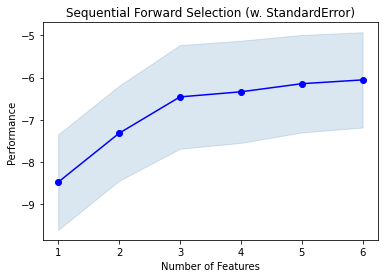

In [ ]:
fig=plot_sfs(sfs1.get_metric_dict(), kind='std_err')
plt.title('Sequential Forward Selection (w. StandardError)')
plt.show()

In [ ]:
sfs1.k_feature_idx_

(0, 5, 13, 24, 26, 27)

In [ ]:
sfs1.k_feature_names_

('TotalPop', 'Native', 'Poverty', 'OtherTransp', 'MeanCommute', 'Employed')

In [ ]:
sfs1.k_score_

-6.055774018024157

In [ ]:
model2=OLS(y, add_constant(X[list(sfs1.k_feature_names_)])).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Unemployment   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     990.8
Date:                Tue, 06 Oct 2020   Prob (F-statistic):               0.00
Time:                        12:49:11   Log-Likelihood:                -7414.9
No. Observations:                3218   AIC:                         1.484e+04
Df Residuals:                    3211   BIC:                         1.489e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.6802      0.983      2.725      0.006       0.752       4.608
TotalPop        0.5934      0.032     18.267      0.000       0.530       0.657
Native          0.0806      0.006     12.927      0.000       0.068       0.093
Citizen         3.2698      0.863      3.791      0.000       1.579       4.961
Poverty         0.2075      0.008     26.576      0.000       0.192       0.223
MeanCommute     0.0939      0.009     10.874      0.000       0.077       0.111
Employed      -21.1363      0.975    -21.680      0.000     -23.048     -19.225
==============================================================================
Omnibus:                      424.389   Durbin-Watson:                   1.749
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3385.297
Skew:                           0.360   Prob(JB):                         0.00
Kurtosis:                       7.973   Cond. No.                         998.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
estimator=LinearRegression()
sfs1=sfs(estimator, 
         k_features=6,
         forward=False,
         floating=True,
         scoring='neg_mean_squared_error', #default - R2
        )

In [ ]:
sfs1.fit(X,y)
sfs1.get_metric_dict()

{32: {'feature_idx': (0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   30,
   31),
  'cv_scores': array([-7.07269207, -2.99266026, -4.65470015, -5.33752378, -9.90275559]),
  'avg_score': -5.992066370464889,
  'feature_names': ('TotalPop',
   'Women',
   'Hispanic',
   'White',
   'Black',
   'Native',
   'Asian',
   'Pacific',
   'Citizen',
   'Income',
   'IncomeErr',
   'IncomePerCap',
   'IncomePerCapErr',
   'Poverty',
   'ChildPoverty',
   'Professional',
   'Service',
   'Office',
   'Construction',
   'Production',
   'Drive',
   'Carpool',
   'Transit',
   'Walk',
   'OtherTransp',
   'WorkAtHome',
   'MeanCommute',
   'Employed',
   'PrivateWork',
   'PublicWork',
   'SelfEmployed',
   'FamilyWork'),
  'ci_bound': 3.0238311259115274,
  'std_dev': 2.352643345440955,
  'std_err': 1.1763216727204775},
 31: {'feature_idx': (0,
   1,

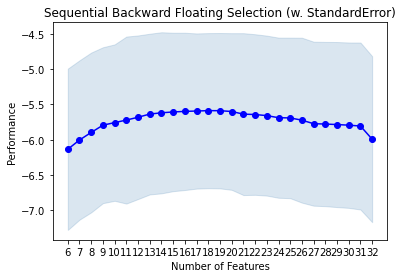

In [ ]:
fig=plot_sfs(sfs1.get_metric_dict(), kind='std_err')
plt.title('Sequential Backward Floating Selection (w. StandardError)')
plt.show()

In [ ]:
sfs1.k_feature_names_

('TotalPop', 'Native', 'Citizen', 'Poverty', 'MeanCommute', 'Employed')

In [ ]:
model_3=OLS(y, add_constant(X[list(sfs1.k_feature_names_)])).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Unemployment   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     990.8
Date:                Tue, 06 Oct 2020   Prob (F-statistic):               0.00
Time:                        12:47:44   Log-Likelihood:                -7414.9
No. Observations:                3218   AIC:                         1.484e+04
Df Residuals:                    3211   BIC:                         1.489e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.6802      0.983      2.725      0.006       0.752       4.608
TotalPop        0.5934      0.032     18.267      0.000       0.530       0.657
Native          0.0806      0.006     12.927      0.000       0.068       0.093
Citizen         3.2698      0.863      3.791      0.000       1.579       4.961
Poverty         0.2075      0.008     26.576      0.000       0.192       0.223
MeanCommute     0.0939      0.009     10.874      0.000       0.077       0.111
Employed      -21.1363      0.975    -21.680      0.000     -23.048     -19.225
==============================================================================
Omnibus:                      424.389   Durbin-Watson:                   1.749
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3385.297
Skew:                           0.360   Prob(JB):                         0.00
Kurtosis:                       7.973   Cond. No.                         998.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Embeded

In [ ]:
from sklearn.linear_model import RidgeCV, LassoCV

In [ ]:
selector4=LassoCV()
selector4.fit(X,y)

LassoCV()

In [ ]:
print('best alpha is', selector4.alpha_)
print('best R2 is', selector4.score(X,y))

best alpha is 0.09493082767478582
best R2 is 0.6333230887766529


In [ ]:
coef=pd.Series(selector4.coef_, index=X.columns)

In [ ]:
sns.set()

<AxesSubplot:>

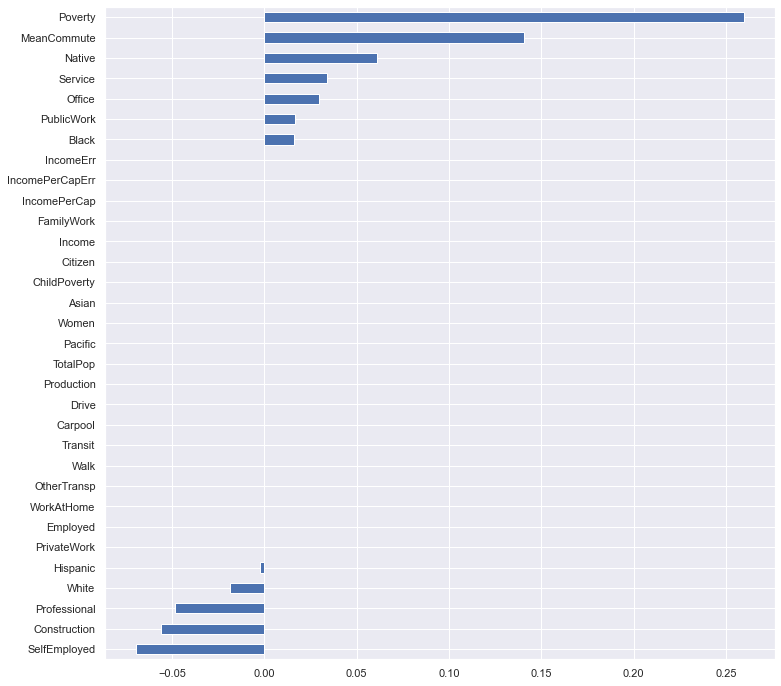

In [ ]:
coef.sort_values().plot.barh(figsize=(12,12))

In [ ]:
coef.Pacific

-0.0

In [ ]:
selector5=RidgeCV()

In [ ]:
selector5.fit(X,y)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]))

In [ ]:
print('best alpha is', selector5.alpha_)
print('best R2 is', selector5.score(X,y))

best alpha is 0.1
best R2 is 0.6888126632027125


<AxesSubplot:>

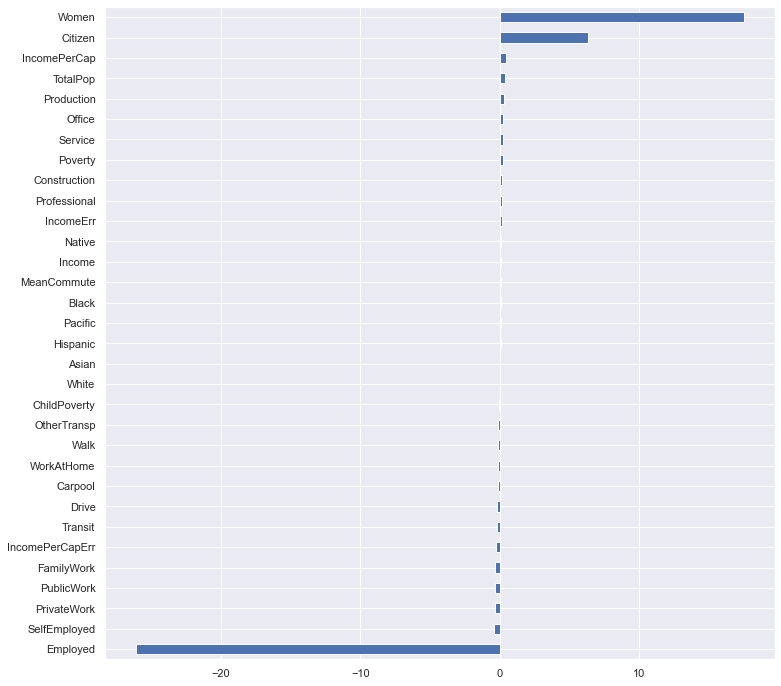

In [ ]:
coef=pd.Series(selector5.coef_, index=X.columns)
coef.sort_values().plot.barh(figsize=(12,12))

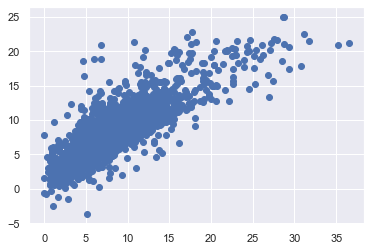

In [ ]:
plt.scatter(y,selector5.predict(X))

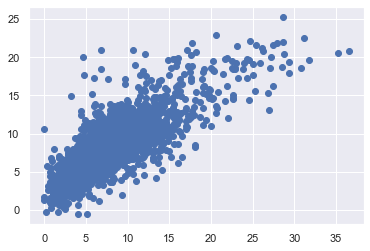

In [ ]:
plt.scatter(y,selector4.predict(X))

In [ ]:
def rmse(actual, pred):
    return ((actual-pred)**2).mean()**0.5

In [ ]:
rmse(y,selector4.predict(X))

2.478107079544109

In [ ]:
rmse(y,selector5.predict(X))

2.2829123848694888

In [ ]:
rmse(y,model_3.predict())

2.4235799233599473

In [ ]:
rmse(y, model2.predict())

2.4235799233599473

In [ ]:
rmse(y, model1.predict())

2.6549054819571136

In [ ]:
rmse(y, model0.predict())

2.5778049169758486